In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
from statsmodels.genmod.families import Gamma
from statsmodels.genmod.families import links
import warnings

warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('C:/Users/Rai/Documents/MBIDS/Proyecto Final/AutoInsuranceClaims2024.csv')
df

,Coverage,Education,Employment Status,Gender,Location,Marital Status,Policy Type,Total Claim Amount,Vehicle Class,Vehicle Size
0,Basic,Bachelor,Employed,F,Urban,Married,Corporate Auto,380.90,Four-Door Car,Medsize
1,Basic,High School or Below,Unemployed,M,Suburban,Single,Personal Auto,1098.36,SUV,Medsize
2,Extended,College,Employed,M,Urban,Single,Personal Auto,783.64,SUV,Medsize
3,Basic,High School or Below,Employed,M,Suburban,Married,Personal Auto,479.52,Two-Door Car,Small
4,Basic,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,622.08,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...
9129,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,231.78,Four-Door Car,Medsize
9130,Basic,Bachelor,Employed,M,Urban,Single,Personal Auto,494.15,SUV,Small
9131,Basic,High School or Below,Employed,F,Suburban,Married,Corporate Auto,421.20,Four-Door Car,Large
9132,Extended,College,Medical Leave,F,Suburban,Married,Personal Auto,518.40,Four-Door Car,Small


In [3]:
bd = df

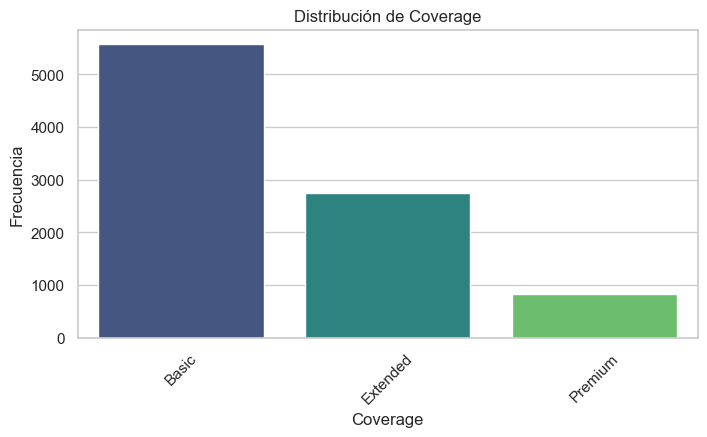

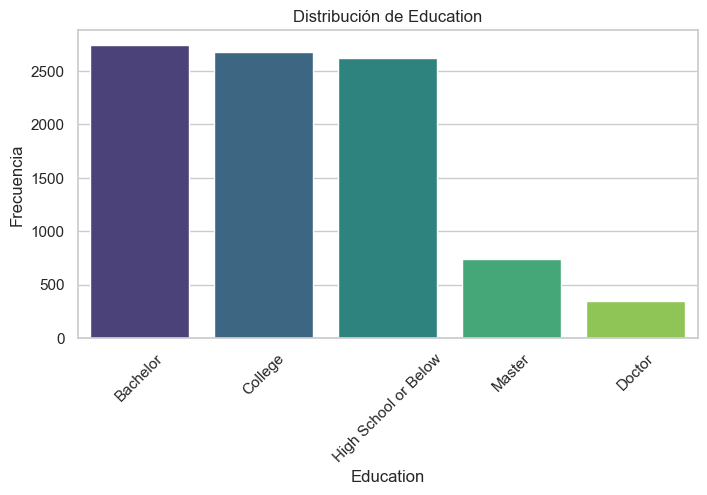

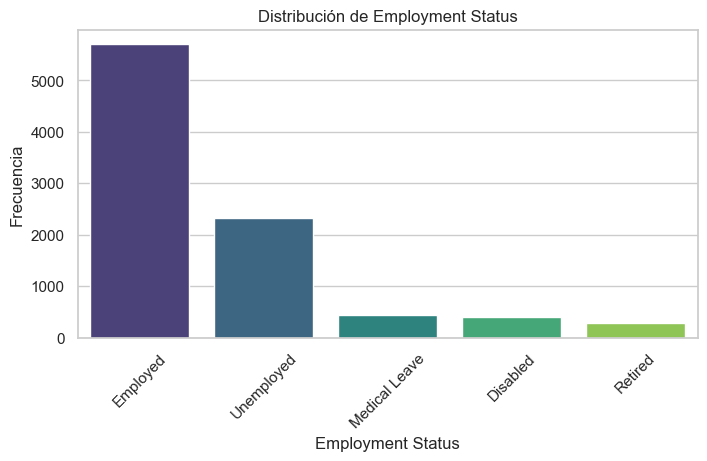

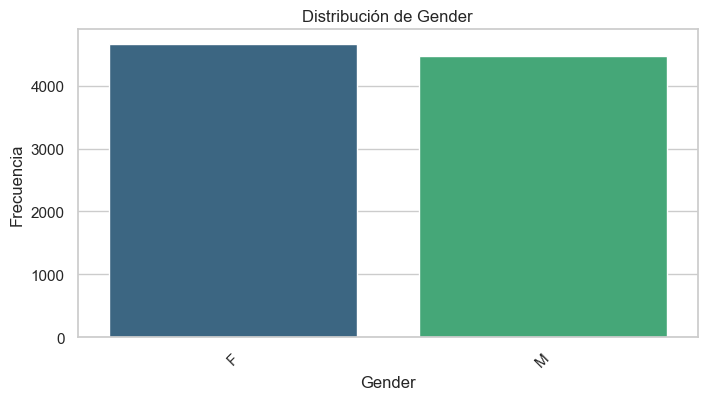

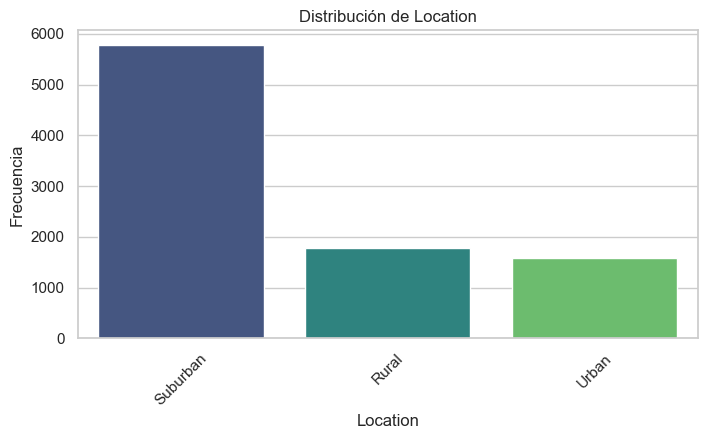

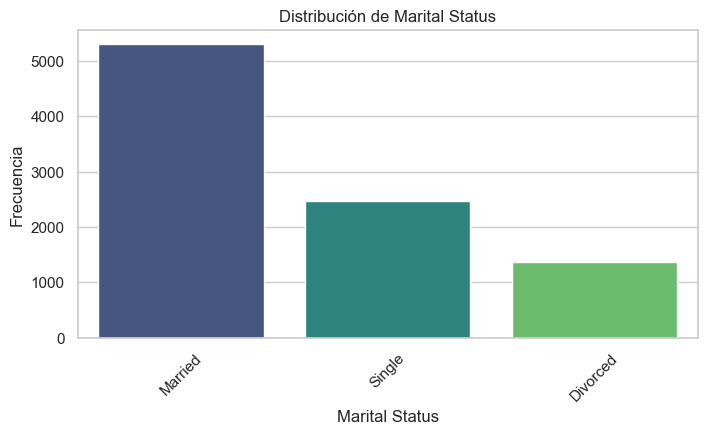

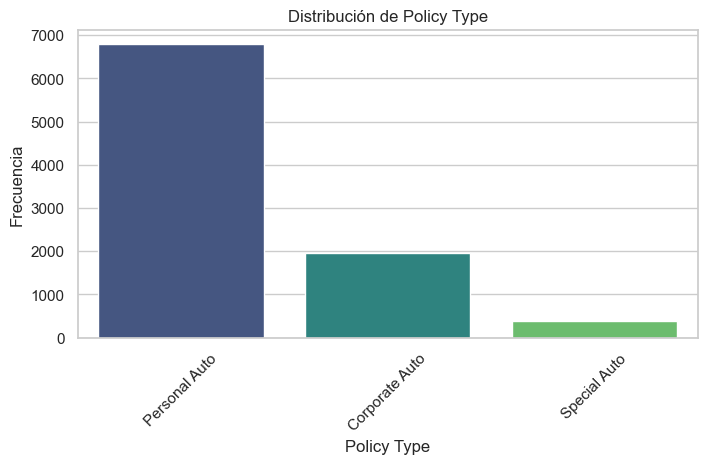

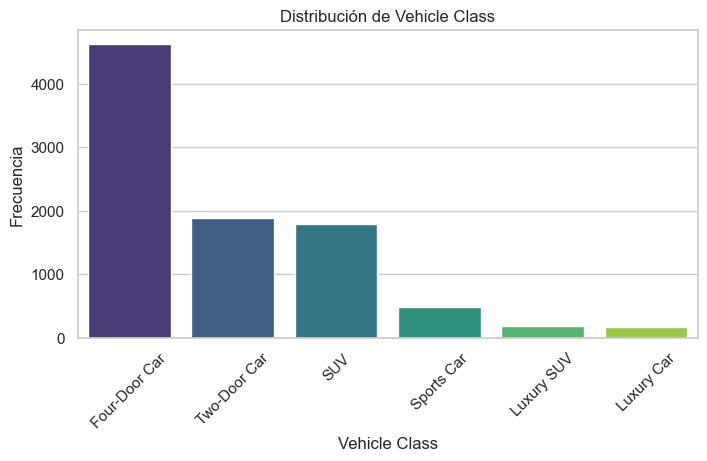

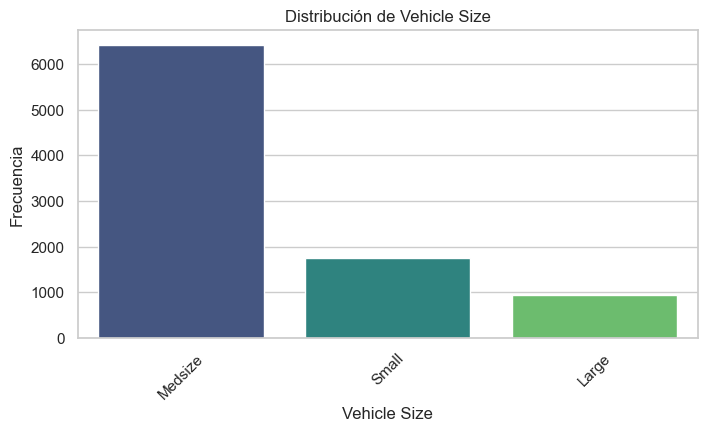

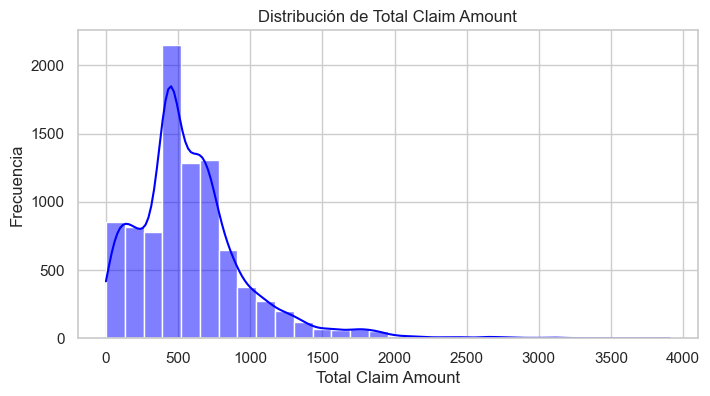

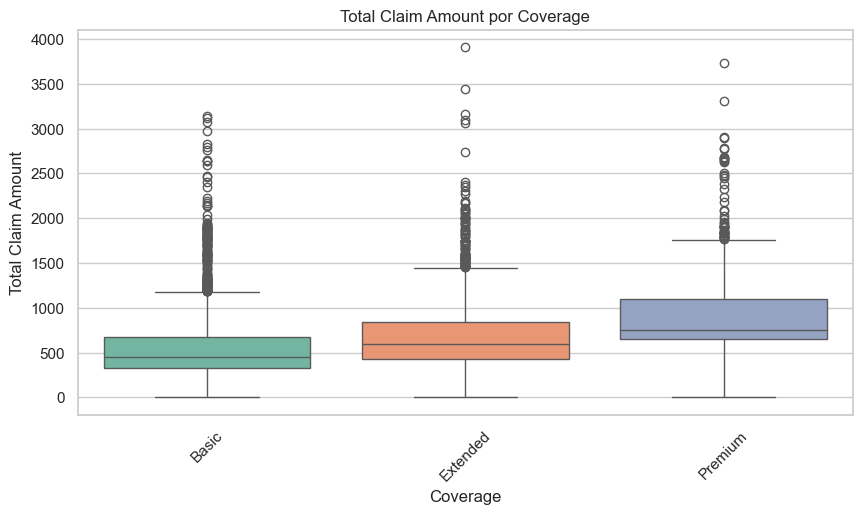

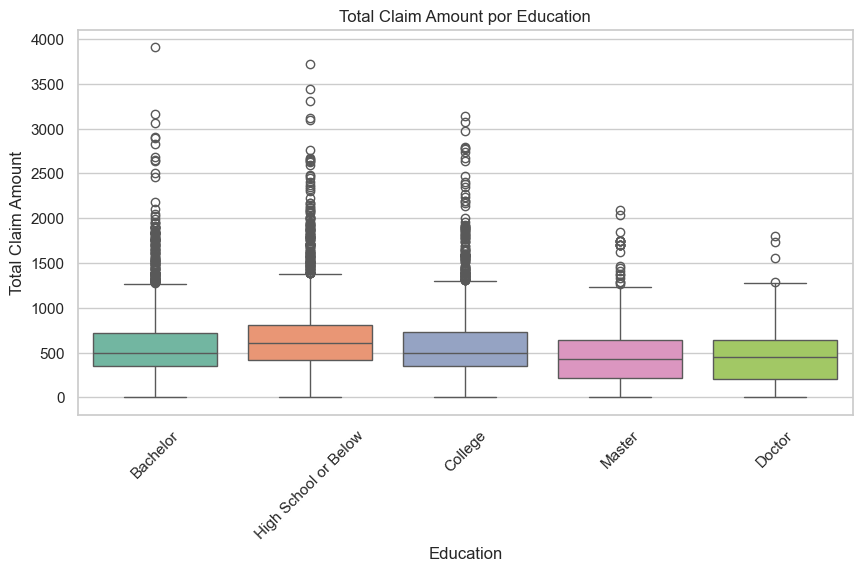

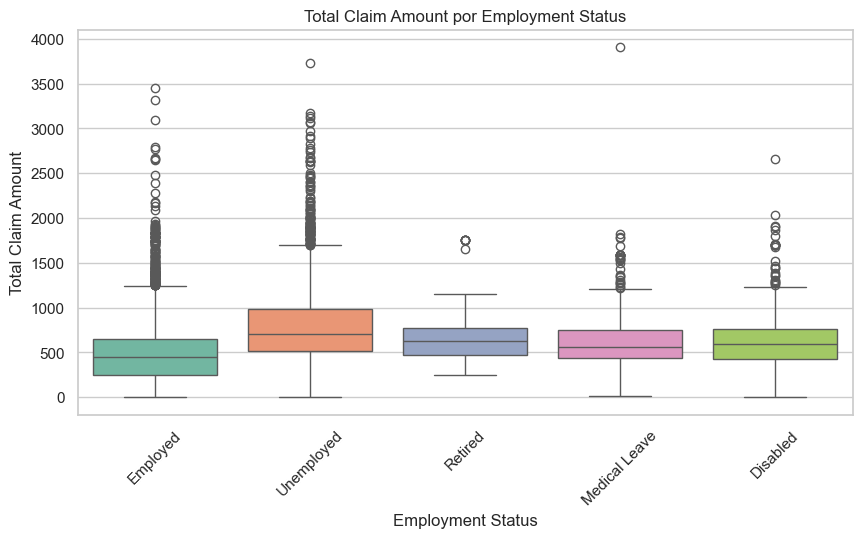

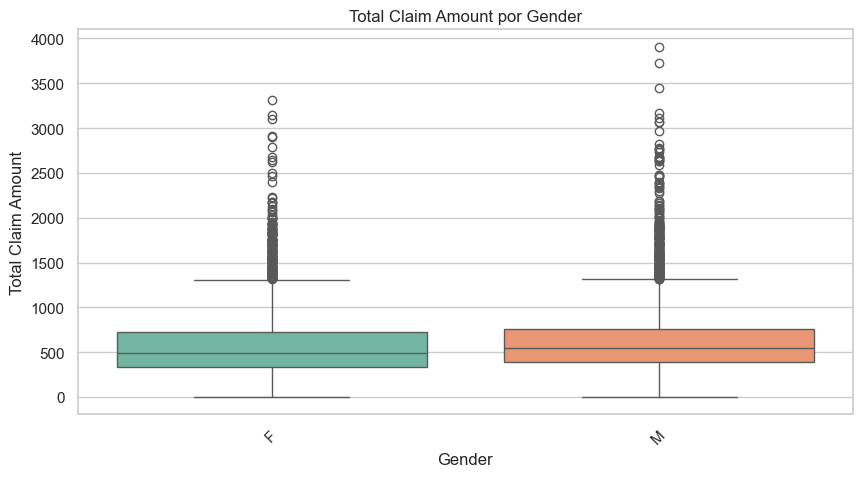

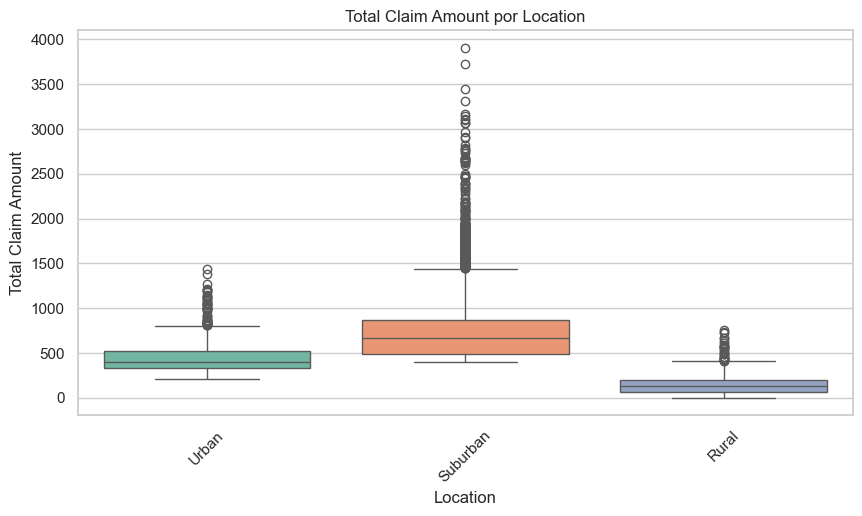

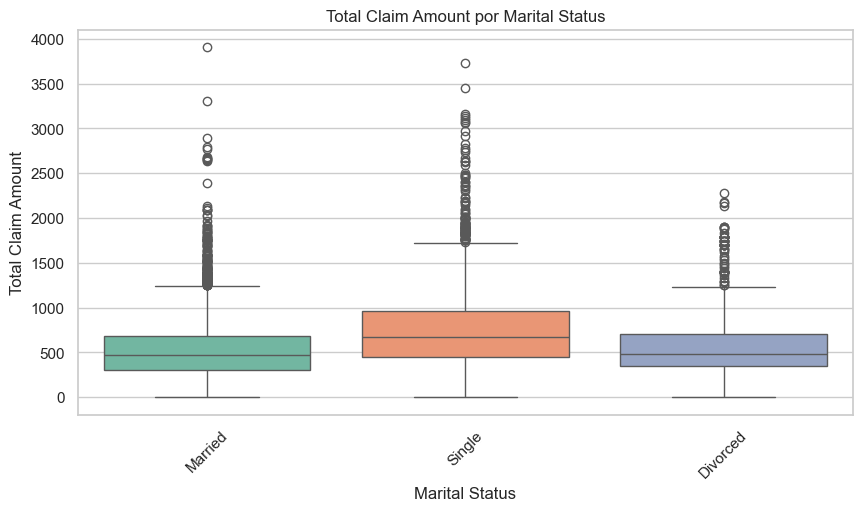

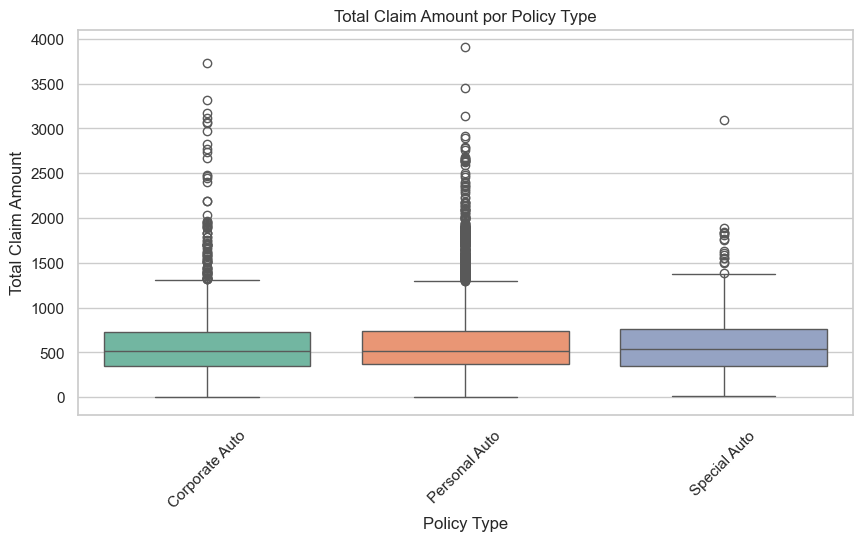

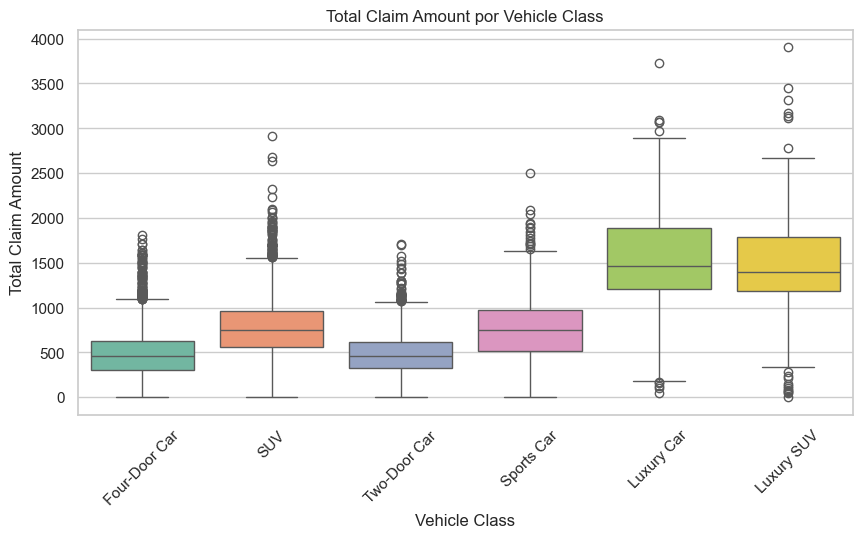

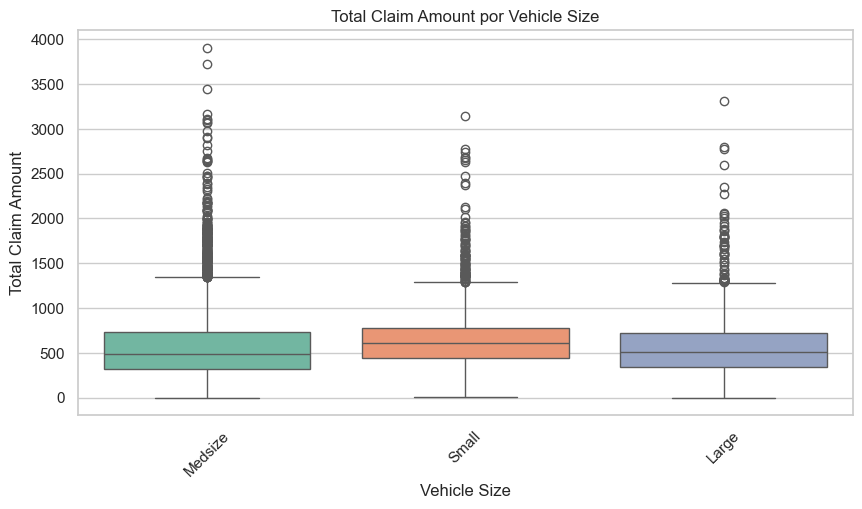

In [4]:


sns.set(style="whitegrid")


categorical_vars = [
    "Coverage", "Education", "Employment Status", "Gender", "Location", 
    "Marital Status", "Policy Type", "Vehicle Class", "Vehicle Size"
]


for var in categorical_vars:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=var, palette="viridis", order=df[var].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribución de {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.show()


plt.figure(figsize=(8, 4))
sns.histplot(df["Total Claim Amount"], bins=30, kde=True, color="blue")
plt.title("Distribución de Total Claim Amount")
plt.xlabel("Total Claim Amount")
plt.ylabel("Frecuencia")
plt.show()


for var in categorical_vars:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=var, y="Total Claim Amount", palette="Set2")
    plt.xticks(rotation=45)
    plt.title(f"Total Claim Amount por {var}")
    plt.xlabel(var)
    plt.ylabel("Total Claim Amount")
    plt.show()


In [5]:
data = bd["Total Claim Amount"].dropna()

pareto_params = stats.pareto.fit(data)
weibull_params = stats.exponweib.fit(data, floc=0)  

print(f"Parámetros Pareto: {pareto_params}")
print(f"Parámetros Weibull: {weibull_params}")

Parámetros Pareto: (469163068.6682397, -274877906943.86987, 274877906943.99985)
Parámetros Weibull: (0.9848350670597392, 1.5293534084803526, 0, 653.4004466125673)


In [6]:
def log_likelihood(distribution, params, data):
    return np.sum(distribution.logpdf(data, *params))

def calculate_aic_bic(log_likelihood_value, k, n):
    aic = 2 * k - 2 * log_likelihood_value
    bic = np.log(n) * k - 2 * log_likelihood_value
    return aic, bic

n = len(data)

ll_pareto = log_likelihood(stats.pareto, pareto_params, data)
ll_weibull = log_likelihood(stats.exponweib, weibull_params, data)


aic_pareto, bic_pareto = calculate_aic_bic(ll_pareto, len(pareto_params), n)
aic_weibull, bic_weibull = calculate_aic_bic(ll_weibull, len(weibull_params), n)


print("\nResultados AIC y BIC:")
print(f"Pareto - AIC: {aic_pareto}, BIC: {bic_pareto}")
print(f"Weibull - AIC: {aic_weibull}, BIC: {bic_weibull}")


Resultados AIC y BIC:
Pareto - AIC: 134698.37550784138, BIC: 134719.73478482262
Weibull - AIC: 132537.19518732664, BIC: 132565.6742233016


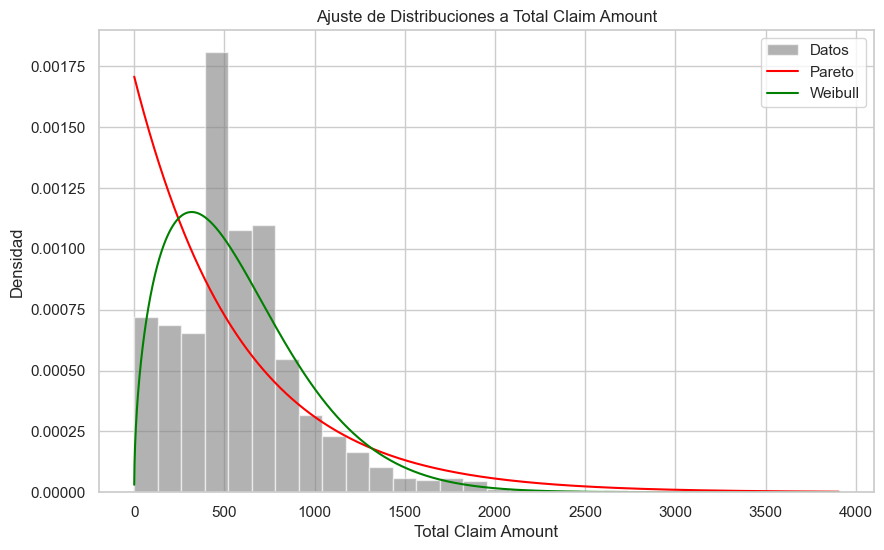

In [7]:
x = np.linspace(min(data), max(data), 9134)
plt.figure(figsize=(10, 6))

plt.hist(data, bins=30, density=True, alpha=0.6, color='gray', label="Datos")

plt.plot(x, stats.pareto.pdf(x, *pareto_params), label='Pareto', color='red')
plt.plot(x, stats.exponweib.pdf(x, *weibull_params), label='Weibull', color='green')

plt.title('Ajuste de Distribuciones a Total Claim Amount')
plt.xlabel('Total Claim Amount')
plt.ylabel('Densidad')
plt.legend()
plt.show()

In [8]:
import numpy as np
import scipy.stats as stats


def log_likelihood(distribution, params, data):
    return np.sum(distribution.logpdf(data, *params))


def calculate_aic_bic(log_likelihood, num_params, num_samples):
    aic = 2 * num_params - 2 * log_likelihood
    bic = num_params * np.log(num_samples) - 2 * log_likelihood
    return aic, bic


weibull_params = stats.exponweib.fit(data, floc=0)


ll_weibull = log_likelihood(stats.exponweib, weibull_params, data)


n = len(data)
k = len(weibull_params)  # Número de parámetros ajustados


aic_weibull, bic_weibull = calculate_aic_bic(ll_weibull, k, n)


print("Parámetros de Weibull:", weibull_params)
print("Log-Verosimilitud de Weibull:", ll_weibull)
print("AIC de Weibull:", aic_weibull)
print("BIC de Weibull:", bic_weibull)


Parámetros de Weibull: (0.9848350670597392, 1.5293534084803526, 0, 653.4004466125673)
Log-Verosimilitud de Weibull: -66264.59759366332
AIC de Weibull: 132537.19518732664
BIC de Weibull: 132565.6742233016


In [9]:
import numpy as np
import scipy.stats as stats


def log_likelihood(distribution, params, data):
    return np.sum(distribution.logpdf(data, *params))


def calculate_aic_bic(log_likelihood, num_params, num_samples):
    aic = 2 * num_params - 2 * log_likelihood
    bic = num_params * np.log(num_samples) - 2 * log_likelihood
    return aic, bic


gamma_params = stats.gamma.fit(data)


ll_gamma = log_likelihood(stats.gamma, gamma_params, data)


n = len(data)
k = len(gamma_params)  # Número de parámetros ajustados


aic_gamma, bic_gamma = calculate_aic_bic(ll_gamma, k, n)


print("Parámetros de Gamma:", gamma_params)
print("Log-Verosimilitud de Gamma:", ll_gamma)
print("AIC de Gamma:", aic_gamma)
print("BIC de Gamma:", bic_gamma)


Parámetros de Gamma: (0.06382836803812883, 0.12999999999999998, 2.0189219620260164)
Log-Verosimilitud de Gamma: -2727956.38166999
AIC de Gamma: 5455918.76333998
BIC de Gamma: 5455940.122616961


In [10]:
import numpy as np
import scipy.stats as stats


def log_likelihood(distribution, params, data):
    return np.sum(distribution.logpdf(data, *params))


def calculate_aic_bic(log_likelihood, num_params, num_samples):
    aic = 2 * num_params - 2 * log_likelihood
    bic = num_params * np.log(num_samples) - 2 * log_likelihood
    return aic, bic


pareto_params = stats.pareto.fit(data)


ll_pareto = log_likelihood(stats.pareto, pareto_params, data)


n = len(data)
k = len(pareto_params)  # Número de parámetros ajustados


aic_pareto, bic_pareto = calculate_aic_bic(ll_pareto, k, n)


print("Parámetros de Pareto:", pareto_params)
print("Log-Verosimilitud de Pareto:", ll_pareto)
print("AIC de Pareto:", aic_pareto)
print("BIC de Pareto:", bic_pareto)


Parámetros de Pareto: (469163068.6682397, -274877906943.86987, 274877906943.99985)
Log-Verosimilitud de Pareto: -67346.18775392069
AIC de Pareto: 134698.37550784138
BIC de Pareto: 134719.73478482262


In [11]:
import numpy as np
import scipy.stats as stats


def log_likelihood(distribution, params, data):
    return np.sum(distribution.logpdf(data, *params))


def calculate_aic_bic(log_likelihood, num_params, num_samples):
    aic = 2 * num_params - 2 * log_likelihood
    bic = num_params * np.log(num_samples) - 2 * log_likelihood
    return aic, bic


expon_params = stats.expon.fit(data)


ll_expon = log_likelihood(stats.expon, expon_params, data)


n = len(data)
k = len(expon_params)  # Número de parámetros ajustados


aic_expon, bic_expon = calculate_aic_bic(ll_expon, k, n)


print("Parámetros de Exponencial:", expon_params)
print("Log-Verosimilitud de Exponencial:", ll_expon)
print("AIC de Exponencial:", aic_expon)
print("BIC de Exponencial:", bic_expon)


Parámetros de Exponencial: (0.13, 585.8899135099628)
Log-Verosimilitud de Exponencial: -67346.18687529725
AIC de Exponencial: 134696.3737505945
BIC de Exponencial: 134710.613268582


In [12]:
# REGRESION LINEAL SIMPLE

import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error


categorical_vars = ["Coverage", "Education", "Employment Status", "Gender", "Location", 
                    "Marital Status", "Policy Type", "Vehicle Class", "Vehicle Size"]


y = df["Total Claim Amount"]


regression_results = []
models = {}

for var in categorical_vars:
    # Convertir variable categórica a variables dummies y asegurarse de que sean numéricas
    X = pd.get_dummies(df[var], drop_first=True).astype(float)
    X = sm.add_constant(X)  # Agregar constante
    

    model = sm.OLS(y, X).fit()
    models[var] = model  # Guardar modelo
    

    r2 = model.rsquared_adj
    mse = mean_squared_error(y, model.predict(X))
    
   
    regression_results.append([var, r2, mse])


regression_results_df = pd.DataFrame(regression_results, columns=["Variable", "R²", "MSE"])


regression_results_df_sorted = regression_results_df.sort_values(by=["R²"], ascending=False)


print("Resumen de R² y MSE ordenados:")
print(regression_results_df_sorted)


for var, model in models.items():
    summary_text = model.summary().as_text()
    # Remover líneas que contienen la fecha y hora
    summary_lines = summary_text.split("\n")
    summary_filtered = "\n".join([line for line in summary_lines if not line.startswith("Date") and not line.startswith("Time")])
    
    print(f"\nResumen de la regresión para {var}:")
    print(summary_filtered)
    print("\n" + "="*80 + "\n")


Resumen de R² y MSE ordenados:
            Variable        R²            MSE
4           Location  0.387032   94244.352814
7      Vehicle Class  0.315788  105163.660459
2  Employment Status  0.127251  134156.459711
0           Coverage  0.079866  141471.365024
5     Marital Status  0.067004  143448.938359
1          Education  0.020504  150565.314159
8       Vehicle Size  0.008507  152442.849573
3             Gender  0.005451  152929.490608
6        Policy Type -0.000158  153775.089234

Resumen de la regresión para Coverage:
                            OLS Regression Results                            
Dep. Variable:     Total Claim Amount   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     397.4
No. Observations:                9134   AIC:                         1.343e+05
Df Residuals:                    9131   BIC:                         1.343

In [13]:
# REGRESION LINEAL MULTIPLE

import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error


categorical_vars = ["Coverage", "Education", "Employment Status", "Gender", "Location", 
                    "Marital Status", "Policy Type", "Vehicle Class", "Vehicle Size"]


y = df["Total Claim Amount"]


X = pd.get_dummies(df[categorical_vars], drop_first=True).astype(float)


X = X.applymap(lambda x: int(x) if isinstance(x, bool) else x)


X = sm.add_constant(X)


X = X.dropna()
y = y.loc[X.index]  # Mantener consistencia en los índices


model = sm.OLS(y, X).fit()


r2 = model.rsquared_adj
mse = mean_squared_error(y, model.predict(X))


print("R² Ajustado:", r2)
print("MSE:", mse)


summary_text = model.summary().as_text()
summary_lines = summary_text.split("\n")
summary_filtered = "\n".join([line for line in summary_lines if not line.startswith("Date") and not line.startswith("Time")])

print("\nResumen de la Regresión Múltiple:")
print(summary_filtered)


R² Ajustado: 0.7556364694492174
MSE: 37480.57219323503

Resumen de la Regresión Múltiple:
                            OLS Regression Results                            
Dep. Variable:     Total Claim Amount   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     1178.
No. Observations:                9134   AIC:                         1.222e+05
Df Residuals:                    9109   BIC:                         1.223e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -2.1853     14.282     -0.153      0.878   

In [14]:
# GLM GAMMA

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error


categorical_vars = ["Coverage", "Education", "Employment Status", "Gender", "Location", 
                    "Marital Status", "Policy Type", "Vehicle Class", "Vehicle Size"]


df_glm = df.copy()


df_glm = pd.get_dummies(df_glm, columns=categorical_vars, drop_first=True).astype(float)


df_glm = df_glm.applymap(lambda x: int(x) if isinstance(x, bool) else x)


df_glm = df_glm.dropna()


y = df_glm["Total Claim Amount"]
X = df_glm.drop(columns=["Total Claim Amount"])


X = sm.add_constant(X)


model_glm_gamma = sm.GLM(y, X, family=sm.families.Gamma(link=sm.families.links.log())).fit()


y_pred = model_glm_gamma.predict(X)
mse = mean_squared_error(y, y_pred)


summary_text = model_glm_gamma.summary().as_text()
summary_lines = summary_text.split("\n")
summary_filtered = "\n".join([line for line in summary_lines if not line.startswith("Date") and not line.startswith("Time")])


print("\nResumen del Modelo GLM - Gamma:")
print(summary_filtered)
print(f"\nMSE del Modelo: {mse:.4f}")



Resumen del Modelo GLM - Gamma:
                 Generalized Linear Model Regression Results                  
Dep. Variable:     Total Claim Amount   No. Observations:                 9134
Model:                            GLM   Df Residuals:                     9109
Model Family:                   Gamma   Df Model:                           24
Link Function:                    log   Scale:                         0.11198
Method:                          IRLS   Log-Likelihood:                -60436.
No. Iterations:                    13   Pseudo R-squ. (CS):             0.9744
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               4.6735      0.025    189.569      0.000       4.625       4.722
Coverage_Extended                  

In [15]:
# GLM WEIBULL

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error


categorical_vars = ["Coverage", "Education", "Employment Status", "Gender", "Location", 
                    "Marital Status", "Policy Type", "Vehicle Class", "Vehicle Size"]


df_glm = df.copy()


df_glm = pd.get_dummies(df_glm, columns=categorical_vars, drop_first=True).astype(float)


df_glm = df_glm.applymap(lambda x: int(x) if isinstance(x, bool) else x)


df_glm = df_glm.dropna()


y = df_glm["Total Claim Amount"]
X = df_glm.drop(columns=["Total Claim Amount"])


X = sm.add_constant(X)


model_glm_weibull = sm.GLM(y, X, family=sm.families.InverseGaussian(link=sm.families.links.log())).fit()


y_pred = model_glm_weibull.predict(X)
mse = mean_squared_error(y, y_pred)


summary_text = model_glm_weibull.summary().as_text()
summary_lines = summary_text.split("\n")
summary_filtered = "\n".join([line for line in summary_lines if not line.startswith("Date") and not line.startswith("Time")])


print("\nResumen del Modelo GLM - Weibull:")
print(summary_filtered)
print(f"\nMSE del Modelo: {mse:.4f}")



Resumen del Modelo GLM - Weibull:
                 Generalized Linear Model Regression Results                  
Dep. Variable:     Total Claim Amount   No. Observations:                 9134
Model:                            GLM   Df Residuals:                     9109
Model Family:         InverseGaussian   Df Model:                           24
Link Function:                    log   Scale:                      0.00055746
Method:                          IRLS   Log-Likelihood:                -89448.
No. Iterations:                    17   Pseudo R-squ. (CS):             0.8477
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               4.6014      0.034    137.324      0.000       4.536       4.667
Coverage_Extended                

In [16]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


categorical_vars = ["Coverage", "Education", "Employment Status", "Gender", "Location", 
                    "Marital Status", "Policy Type", "Vehicle Class", "Vehicle Size"]


df_rf = df.copy()


df_rf = pd.get_dummies(df_rf, columns=categorical_vars, drop_first=True).astype(float)


df_rf = df_rf.applymap(lambda x: int(x) if isinstance(x, bool) else x)


df_rf = df_rf.dropna()


y = df_rf["Total Claim Amount"]
X = df_rf.drop(columns=["Total Claim Amount"])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)


mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)


mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)


print("Resultados en la base de entrenamiento:")
print(f"MSE: {mse_train:.4f}")
print(f"R²: {r2_train:.4f}")

print("\nResultados en la base de prueba:")
print(f"MSE: {mse_test:.4f}")
print(f"R²: {r2_test:.4f}")


Resultados en la base de entrenamiento:
MSE: 13307.2169
R²: 0.9141

Resultados en la base de prueba:
MSE: 29775.9317
R²: 0.8008


In [17]:
# XG BOOSTING
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


categorical_vars = ["Coverage", "Education", "Employment Status", "Gender", "Location", 
                    "Marital Status", "Policy Type", "Vehicle Class", "Vehicle Size"]


df_xgb = df.copy()


df_xgb = pd.get_dummies(df_xgb, columns=categorical_vars, drop_first=True).astype(float)


df_xgb = df_xgb.applymap(lambda x: int(x) if isinstance(x, bool) else x)


df_xgb = df_xgb.dropna()


y = df_xgb["Total Claim Amount"]
X = df_xgb.drop(columns=["Total Claim Amount"])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)


y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)


mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)


mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)


print("Resultados en la base de entrenamiento:")
print(f"MSE: {mse_train:.4f}")
print(f"R²: {r2_train:.4f}")

print("\nResultados en la base de prueba:")
print(f"MSE: {mse_test:.4f}")
print(f"R²: {r2_test:.4f}")


Resultados en la base de entrenamiento:
MSE: 16397.6077
R²: 0.8941

Resultados en la base de prueba:
MSE: 28965.8393
R²: 0.8062


In [18]:
# Support vector regressor
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


categorical_vars = ["Coverage", "Education", "Employment Status", "Gender", "Location", 
                    "Marital Status", "Policy Type", "Vehicle Class", "Vehicle Size"]


df_svr = pd.get_dummies(df, columns=categorical_vars, drop_first=True).astype(float)


df_svr = df_svr.applymap(lambda x: int(x) if isinstance(x, bool) else x)


df_svr = df_svr.dropna()


y = df_svr["Total Claim Amount"]
X = df_svr.drop(columns=["Total Claim Amount"])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()


svr_model = SVR(kernel="rbf", C=100, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train_scaled)


y_train_pred_scaled = svr_model.predict(X_train_scaled)
y_test_pred_scaled = svr_model.predict(X_test_scaled)


y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).ravel()
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()


mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)


mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)


print("Resultados en la base de entrenamiento:")
print(f"MSE: {mse_train:.4f}")
print(f"R²: {r2_train:.4f}")

print("\nResultados en la base de prueba:")
print(f"MSE: {mse_test:.4f}")
print(f"R²: {r2_test:.4f}")


Resultados en la base de entrenamiento:
MSE: 14445.4075
R²: 0.9067

Resultados en la base de prueba:
MSE: 33909.4924
R²: 0.7731


In [19]:
# KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


categorical_vars = ["Coverage", "Education", "Employment Status", "Gender", "Location", 
                    "Marital Status", "Policy Type", "Vehicle Class", "Vehicle Size"]


df_knn = df.copy()


df_knn = pd.get_dummies(df_knn, columns=categorical_vars, drop_first=True).astype(float)


df_knn = df_knn.applymap(lambda x: int(x) if isinstance(x, bool) else x)


df_knn = df_knn.dropna()


y = df_knn["Total Claim Amount"]
X = df_knn.drop(columns=["Total Claim Amount"])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)


knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)


y_train_pred = knn_model.predict(X_train_scaled)
y_test_pred = knn_model.predict(X_test_scaled)


mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)


mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)


print("Resultados en la base de entrenamiento:")
print(f"MSE: {mse_train:.4f}")
print(f"R²: {r2_train:.4f}")

print("\nResultados en la base de prueba:")
print(f"MSE: {mse_test:.4f}")
print(f"R²: {r2_test:.4f}")


Resultados en la base de entrenamiento:
MSE: 29469.0173
R²: 0.8097

Resultados en la base de prueba:
MSE: 39678.8955
R²: 0.7345
